In [13]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## Clasificación

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/juarezefren/datasets/main/Iris.csv')

In [24]:
df.drop(columns=['Id'], inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf=DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


### Metricas de Rendimiento

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9333333333333333

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.75      0.86         8
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.93        30
      macro avg       0.96      0.92      0.93        30
   weighted avg       0.94      0.93      0.93        30


Confusion Matrix:
 [[ 9  0  0]
 [ 0  6  2]
 [ 0  0 13]]


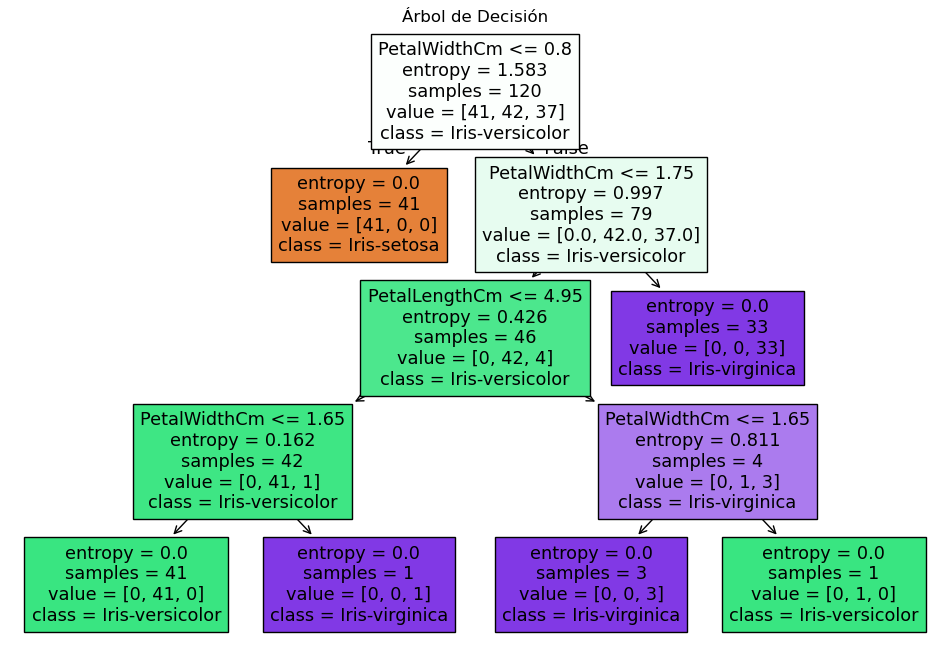

In [31]:
### Visualización del árbol de decisión

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.title("Árbol de Decisión")
plt.show()

### Validacion Cruzada

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10)
print("Mean cross-validation score:", scores.mean())

Mean cross-validation score: 0.96


## Regresion

In [49]:
rg = pd.read_csv('https://raw.githubusercontent.com/juarezefren/datasets/main/energy_efficiency_data_letras.csv')
rg.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,B,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,C,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,D,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,E,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,B,0.0,0,20.84,28.28


In [51]:
rg['Orientation'].unique()

array(['B', 'C', 'D', 'E'], dtype=object)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
rg["Orientation"] = le.fit_transform(rg["Orientation"])
rg.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,1,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0,0.0,0,20.84,28.28


In [54]:
X1 = rg.iloc[:,0:8]
y1 = rg.iloc[:,-2]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
reg = DecisionTreeRegressor(criterion='squared_error', random_state=0)
reg.fit(X1_train, y1_train)
y1_pred = reg.predict(X1_test)

### Metricas de Rendimiento

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y1_test, y1_pred))
print("R^2 Score:", r2_score(y1_test, y1_pred))

Mean Squared Error: 0.3007818181818183
R^2 Score: 0.9968055826906811


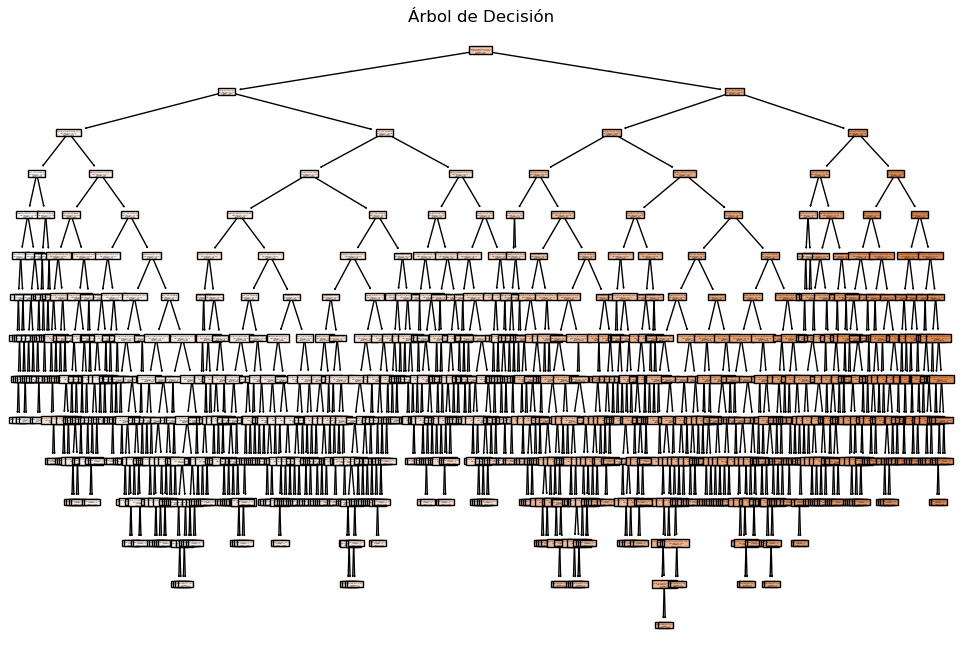

In [59]:
### Visualización del árbol de decisión

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(reg, filled=True, feature_names=X1.columns, class_names=['Low', 'Medium', 'High'])
plt.title("Árbol de Decisión")
plt.show()

### Validacion

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, X1, y1, cv=10)
print("Mean cross-validation score:", scores.mean())

Mean cross-validation score: 0.9687168924085643
